# Weater Data Extraction and Analysis

This notebook seeks to examine the weather data files and hopefully develop a means for easy extraction and Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# import data
f = open("TillamookOR.txt", 'r')
# get all lines
lines = f.readlines()

In [5]:
original_list = lines[0].strip("\n").split(" ")
new_list = []
for val in original_list:
    if len(val) >0:
        new_list.append(val)
new_list

['TMOR', '45.4', '123.8', '390.0', '0.0', '0.3']

In [6]:
def str_list_condense(lines,index):
    """
    Takes a list and which index we are looking at which is essentially just a list of lines
    
    returns the new condensed list
    """
    original_list = lines[index].strip("\n").split(" ")
    new_list = []
    for val in original_list:
        if len(val) >0:
            new_list.append(val)
    new_list
    return new_list
def convert_textfile(file_name, headers):
    """
    Takes input of filename
    
    Will then subsequently utilize the helper function 

    """
    data = {

    }

    # add data
    with open(file_name, 'r') as f:
        lines =  f.readlines()
        # add headers to dictionary
        for k in headers:
            if k not in data:
                data[k] = []
        # add data (skip row 1)
        for row in range(1,len(lines)):
            data_list = str_list_condense(lines,row)
            ## add data to dictionary
            for k in range(len(data_list)):
                data[list(data.keys())[k]] .append(data_list[k])
    return data
        # next then add data to relevant heading
headers = ["Year and Day of Year", "Solar Radiation", "Mean Temp (C)", "Max Temp (C)", "Min Temp (C)","Total Precipitation (mm)","average wind speed (m/s)"]
data_wth = convert_textfile("TillamookOR.txt",headers)

In [7]:
df_wth = pd.DataFrame(data_wth)
df_wth.head()

,Year and Day of Year,Solar Radiation,Mean Temp (C),Max Temp (C),Min Temp (C),Total Precipitation (mm),average wind speed (m/s)
0,80001,3.4,12.0,15.0,8.0,5.1,3.3
1,80002,2.6,9.0,12.0,6.0,16.3,3.4
2,80003,1.1,5.0,9.0,1.0,0.5,3.7
3,80004,1.1,6.0,8.0,4.0,10.7,3.4
4,80005,2.1,6.0,9.0,2.0,21.8,3.0


In [8]:
df_wth['Year and Day of Year'][0]

'80001'

In [9]:
'1001'.zfill(5)

'01001'

In [10]:
import datetime
datetime.date.fromordinal(3142)

datetime.date(9, 8, 8)

In [11]:
from datetime import timedelta,datetime
def data_conversion(data):
    """Converting the Year and Day of Year to actual datetime, only 365 days allowed per year"""
    for row in range(len(data['Year and Day of Year'])):
        adj_time = data['Year and Day of Year'][row].zfill(5)
        ## first two values in string dictate year
        year = adj_time[:2]
        if int(year[0]) == 0:
            year = "200"+year[1]
        elif int(year) < 25:
            year = "20" +year
        elif int(year) > 25:
            year = "19"+year
        year = int(year)
        ## last three values dictate the day of the year
        day = int(adj_time[2:])

        # use timedelta to get the datetime
        ## first day of year
        jan1 = datetime(year, 1, 1)
        ## edge case where it is first day of year
        if day == 1:
            date_t = jan1

        else:
            ## adjustment
            delta_t = timedelta(days=day-1)
            ## apply adjustement to get datetime
            date_t = jan1+delta_t
        # now replace date_t in the dateframe
        data['Year and Day of Year'][row] = date_t
    return data






df_wth = data_conversion(df_wth)
df_wth.rename(columns = {'Year and Day of Year':'Date'},inplace = True)
df_wth

,Date,Solar Radiation,Mean Temp (C),Max Temp (C),Min Temp (C),Total Precipitation (mm),average wind speed (m/s)
0,1980-01-01 00:00:00,3.4,12.0,15.0,8.0,5.1,3.3
1,1980-01-02 00:00:00,2.6,9.0,12.0,6.0,16.3,3.4
2,1980-01-03 00:00:00,1.1,5.0,9.0,1.0,0.5,3.7
3,1980-01-04 00:00:00,1.1,6.0,8.0,4.0,10.7,3.4
4,1980-01-05 00:00:00,2.1,6.0,9.0,2.0,21.8,3.0
...,...,...,...,...,...,...,...
9485,2005-12-27 00:00:00,1.6,13.0,16.0,10.0,20.8,4.7
9486,2005-12-28 00:00:00,3.1,12.0,14.0,10.0,42.7,4.7
9487,2005-12-29 00:00:00,2.4,12.0,13.0,11.0,33.3,5.0
9488,2005-12-30 00:00:00,1.9,11.0,12.0,9.0,8.4,5.4


## Analysis -> Precipitation


In [12]:
df_wth['Date'][0] +datetime(year =2)         

TypeError: function missing required argument 'month' (pos 2)

In [13]:
datetime(year = 1982, month =1, day =1)

datetime.datetime(1982, 1, 1, 0, 0)

In [14]:
# Begining Year?
Start_Year =  2
Num_Years = 25

data_OSU = df_wth[df_wth['Date'] >= datetime(year = df_wth['Date'][0].year +2, month =1 , day = 1 )]


In [15]:
data_OSU

,Date,Solar Radiation,Mean Temp (C),Max Temp (C),Min Temp (C),Total Precipitation (mm),average wind speed (m/s)
730,1982-01-01 00:00:00,1.7,3.0,6.0,0.0,13.0,4.7
731,1982-01-02 00:00:00,4.5,3.0,7.0,-1.0,3.8,4.9
732,1982-01-03 00:00:00,1.2,3.0,6.0,0.0,14.7,4.9
733,1982-01-04 00:00:00,7.2,4.0,7.0,2.0,19.6,1.8
734,1982-01-05 00:00:00,3.0,2.0,6.0,-2.0,14.0,2.4
...,...,...,...,...,...,...,...
9485,2005-12-27 00:00:00,1.6,13.0,16.0,10.0,20.8,4.7
9486,2005-12-28 00:00:00,3.1,12.0,14.0,10.0,42.7,4.7
9487,2005-12-29 00:00:00,2.4,12.0,13.0,11.0,33.3,5.0
9488,2005-12-30 00:00:00,1.9,11.0,12.0,9.0,8.4,5.4


### Runoff Analysis
using the SCS curve number...


In [71]:
data_OSU.groupby(by = ["year"],group_keys=False)['Total Precipitation (mm)'].max().sort_values(ascending = False)

year
1998    97.8
1987    95.3
1997    93.0
1991    92.7
1995    91.4
1996    91.4
1982     9.9
2003     9.9
2002     9.9
2001     9.9
2000     9.9
1994     9.9
1993     9.9
1992     9.9
1990     9.9
1986     9.9
1984     9.9
2005     9.9
1983     9.7
1999     9.7
1988     9.7
2004     9.7
1989     9.4
1985     9.1
Name: Total Precipitation (mm), dtype: object

In [127]:
## Precip Data to float...
data_OSU['Total Precipitation (mm)'] = np.array(data_OSU['Total Precipitation (mm)']).astype(float)

## Find the max precip for every year
data_OSU['year']=pd.DatetimeIndex(data_OSU['Date']).year
years = data_OSU['year'].unique()
## max precip
precip_dat = data_OSU.groupby(by = ["year"],group_keys=False)['Total Precipitation (mm)'].max().sort_values(ascending = False).reset_index()
precip_yr = precip_dat['year']

## Due to limited data just to the maximum precip and respective year and classed that as the 25 year, 24 hour storm event... even though more like 24 years...
print(precip_yr)
precip_sort = list(precip_dat['Total Precipitation (mm)'])
# print(type(precip_sort))
# sorted_maximums = precip_sort

# # Calculate return periods using Weibull's formula
# n = len(sorted_maximums)  # Number of data points
# return_periods = [(n + 1) / rank for rank, _ in enumerate(sorted_maximums, start=1)]

# # Find the value closest to a 25-year return period
# closest_to_25 = min(sorted_maximums, key=lambda x: abs(return_periods[sorted_maximums.index(x)] - 25))

# # Return the value and its corresponding return period
# return_period_25 = return_periods[sorted_maximums.index(closest_to_25)]

# print("Ranked Annual Maximums (Descending Order):", sorted_maximums)
# print("Return Periods (Calculated):", return_periods)
# print(f"Estimated 25-Year, 24-Hour Storm Event: {closest_to_25} mm (Return Period: {return_period_25:.2f})")
storm_event_25 = precip_sort[0]
storm_event_25_yr = precip_yr[0]
print(f"\nyear of estimate 25-year, 24 hour storm event {precip_yr[0]} The precipitation for the storm event: {precip_sort[0]} \n\n")

0     1982
1     1996
2     1994
3     2003
4     1990
5     2004
6     1995
7     1999
8     1998
9     1987
10    1997
11    1991
12    2002
13    1983
14    2000
15    1989
16    1984
17    1986
18    1985
19    2005
20    1992
21    2001
22    1993
23    1988
Name: year, dtype: int32

year of estimate 25-year, 24 hour storm event 1982 The precipitation for the storm event: 132.6 




C:\Users\lkrow\AppData\Local\Temp\ipykernel_27032\2853028192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_OSU['Total Precipitation (mm)'] = np.array(data_OSU['Total Precipitation (mm)']).astype(float)
C:\Users\lkrow\AppData\Local\Temp\ipykernel_27032\2853028192.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_OSU['year']=pd.DatetimeIndex(data_OSU['Date']).year


In [128]:
precip_dat

,year,Total Precipitation (mm)
0,1982,132.6
1,1996,122.9
2,1994,118.6
3,2003,109.7
4,1990,105.2
5,2004,104.9
6,1995,101.1
7,1999,101.1
8,1998,97.8
9,1987,95.3


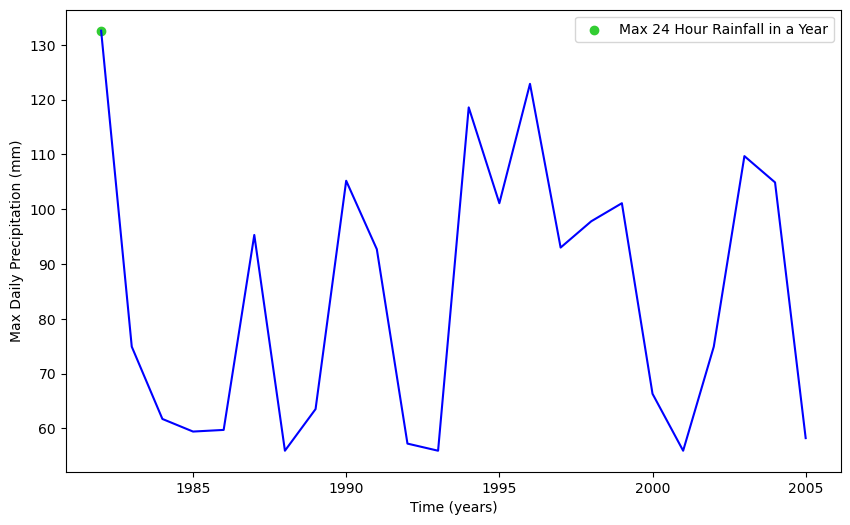

In [137]:
plt.figure(figsize=(10,6))
precip_plot = data_OSU.groupby(by = ["year"],group_keys=False)['Total Precipitation (mm)'].max().reset_index()
precip_plot
plt.plot(precip_plot['year'],precip_plot['Total Precipitation (mm)'], color = 'blue')
plt.scatter(storm_event_25_yr,precip_plot['Total Precipitation (mm)'][precip_plot["year"] == storm_event_25_yr],color = "limegreen", label = "Max 24 Hour Rainfall in a Year")
plt.xlabel('Time (years)')
plt.ylabel('Max Daily Precipitation (mm)')
plt.legend()
plt.show()

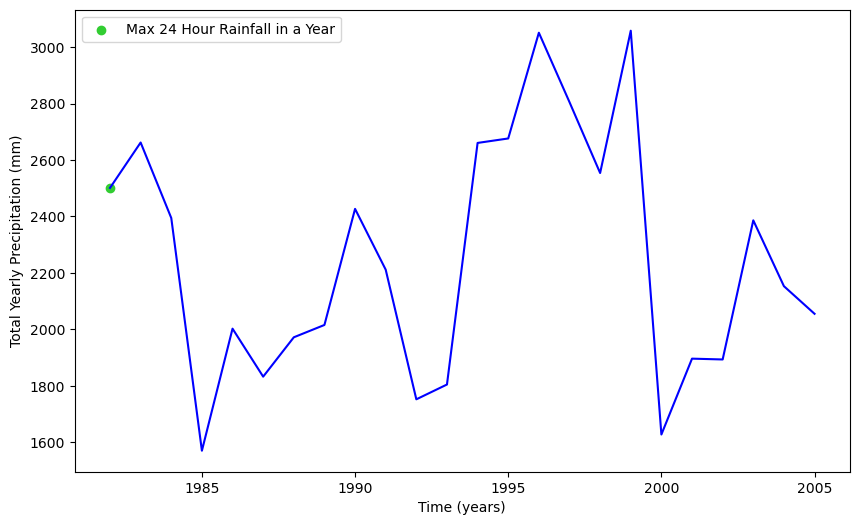

In [134]:
plt.figure(figsize=(10,6))
precip_plot = data_OSU.groupby(by = ["year"],group_keys=False)['Total Precipitation (mm)'].sum().reset_index()
precip_plot
plt.plot(precip_plot['year'],precip_plot['Total Precipitation (mm)'], color = 'blue')
plt.scatter(storm_event_25_yr,precip_plot['Total Precipitation (mm)'][precip_plot["year"] == storm_event_25_yr],color = "limegreen", label = "Max 24 Hour Rainfall in a Year")
plt.xlabel('Time (years)')
plt.ylabel('Total Yearly Precipitation (mm)')
plt.legend()
plt.show()

5.2204724409448815
0.0
0.23729420186113098
0.47458840372226196
0.7118826055833929
0.9491768074445239
1.186471009305655
1.4237652111667858
1.6610594130279168
1.8983536148890479
2.1356478167501787
2.37294201861131
2.6102362204724407
2.6102362204724407
2.392716535433071
2.1751968503937005
1.9576771653543306
1.7401574803149606
1.5226377952755905
1.3051181102362204
1.0875984251968505
0.8700787401574803
0.6525590551181102
0.4350393700787403
0.21751968503937036
0.0


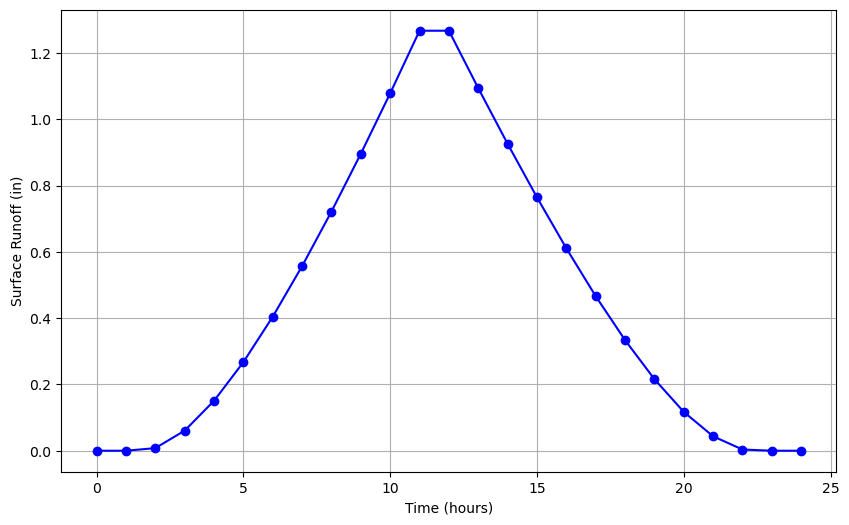

In [112]:
# SCS or NRCS Curve Number Method
## Curve Number -> Utilized in IFSM Soil Type
CN = 85

## Calculate S (max retention after runoff beings)
S = (1000/CN) - 10 # in

## Inital Abstraction (storage)
Ia = .2*S # in

## precip
precip_25 = storm_event_25 * (1/25.4)
print(precip_25)
## Precipitation:
### Assume 1/2 of precipitation lands at 12 hour mark
precip_dist = np.concatenate([np.linspace(0,precip_25/2,12),np.linspace(precip_25/2,0,25 -12)])
time = np.arange(0,25,1)

## Initial Abstraction Check
### P > Ia?
Q_dat = []
for p in precip_dist:
    print(p)
    if p > Ia:
        Q = ((p - Ia)**2)/(p-Ia +S)
    else:
        Q = 0
    Q_dat.append(Q)


## Surface Runoff Hydrograph Plot
plt.figure(figsize=(10,6))
plt.plot(time,Q_dat,color = 'blue', marker = 'o')
plt.xlabel('Time (hours)')
plt.ylabel('Surface Runoff (in)')
plt.grid()
plt.show()

